In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

In [14]:
def load_result(file_name):
    data = np.loadtxt("results/results_"+file_name+".txt", delimiter=",")
    return data

base_data = load_result("base")
baseSoft_data = load_result("baseSoft")
paste_data = load_result("paste")
pasteSoft_data = load_result("pasteSoft")
pix_data = load_result("pix")
pixSoft_data = load_result("pixSoft")


Paired t-test for each with each

In [15]:
k=3 # 0 - accyracy, 1 - precision, 2 - recall, 3 - balanced accuracy 

model = [base_data, paste_data, pix_data, baseSoft_data, pasteSoft_data, pixSoft_data]
model_names = ['Base', 'Copy-Paste', 'Pix2pix', 'Base + Soft', 'Copy-Paste + Soft', 'Pix2pix + Soft']
t_stat = pd.DataFrame(index=model_names, columns=model_names, dtype=float)
p_values = pd.DataFrame(index=model_names, columns=model_names, dtype=float)
for i in range(len(model_names)):
    for j in range(len(model_names)):
        t, p = stats.ttest_ind_from_stats(mean1=model[i].mean(axis=0)[k], std1=model[i].std(axis=0)[k], nobs1=len(model[i]), 
                                    mean2=model[j].mean(axis=0)[k], std2=model[j].std(axis=0)[k], nobs2=len(model[j]))
        t_stat.loc[model_names[i], model_names[j]] = t
        t_stat.loc[model_names[j], model_names[i]] = -t
        p_values.loc[model_names[i], model_names[j]] = p
        p_values.loc[model_names[j], model_names[i]] = p
t_stat_binary = t_stat.applymap(lambda x: 1 if x > 0 else 0)
p_values_binary = p_values.applymap(lambda x: 1 if x < 0.05 else 0)
final_results = t_stat_binary * p_values_binary

print("t>0, p<0.05")
final_results

t>0, p<0.05


,Base,Copy-Paste,Pix2pix,Base + Soft,Copy-Paste + Soft,Pix2pix + Soft
Base,0,0,0,0,0,0
Copy-Paste,1,0,0,0,0,0
Pix2pix,1,1,0,0,0,0
Base + Soft,1,1,0,0,0,0
Copy-Paste + Soft,1,1,1,1,0,0
Pix2pix + Soft,1,1,1,1,1,0


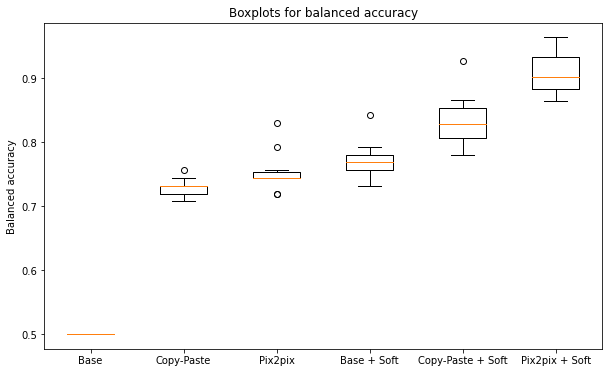

In [16]:
data = np.array([base_data[:,k], paste_data[:,k], pix_data[:,k], baseSoft_data[:,k], pasteSoft_data[:,k], pixSoft_data[:,k]])

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data.T, labels=model_names)
ax.set_title("Boxplots for balanced accuracy")
ax.set_ylabel("Balanced accuracy")
plt.show()

Friedman test

In [17]:
from scipy.stats import friedmanchisquare

statistic, p_value = friedmanchisquare(base_data[:,k], paste_data[:,k], 
                                pix_data[:,k], baseSoft_data[:,k], 
                                pasteSoft_data[:,k], pixSoft_data[:,k])

print("Test statistics:", statistic)
print("Value p:", p_value)

Test statistics: 45.576368876080686
Value p: 1.1076611612325998e-08


There is a significant difference between at least one of the pairs of groups

Test Post hoc

In [18]:
dunn = sp.posthoc_dunn(np.array(data), p_adjust = 'holm')
dunn[dunn < 0.05]

,1,2,3,4,5,6
1,NaN,NaN,0.049473,0.004489,0.000007,3.821608e-09
2,NaN,NaN,NaN,NaN,0.007580,3.994023e-05
3,4.947284e-02,NaN,NaN,NaN,NaN,4.026281e-03
4,4.489071e-03,NaN,NaN,NaN,NaN,4.754406e-02
5,7.017619e-06,0.00758,NaN,NaN,NaN,NaN
6,3.821608e-09,0.00004,0.004026,0.047544,NaN,NaN
